In [ ]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('retail_sales_data.csv')
print(data.head())

         Date  Product_ID Product_Name     Category  Sales_Price  Cost_Price  \
0  2023-01-01        1001    Product A  Electronics          500         350   
1  2023-01-02        1002    Product B  Electronics          600         400   
2  2023-01-03        1003    Product C     Clothing           50          30   
3  2023-01-04        1004    Product D     Clothing           40          25   
4  2023-01-05        1005    Product E   Home Decor          100          70   

   Quantity_Sold  Inventory_Count  
0             20              100  
1             15               80  
2             50              200  
3             80              120  
4             30              150  


In [11]:
print(df.columns)

Index(['Date', 'Product_ID', 'Product_Name', 'Category', 'Sales_Price',
       'Cost_Price', 'Quantity_Sold', 'Inventory_Count'],
      dtype='object')


In [33]:
df['Sales_Revenue'] = df['Sales_Price'] * df['Quantity_Sold']
total_sales = df.groupby('Category')['Sales_Revenue'].sum()

print("Total Sales Revenue for Each Product Category:")
print(total_sales)


Total Sales Revenue for Each Product Category:
Category
Clothing        47918
Electronics    174310
Home Decor      60470
Name: Sales_Revenue, dtype: int64


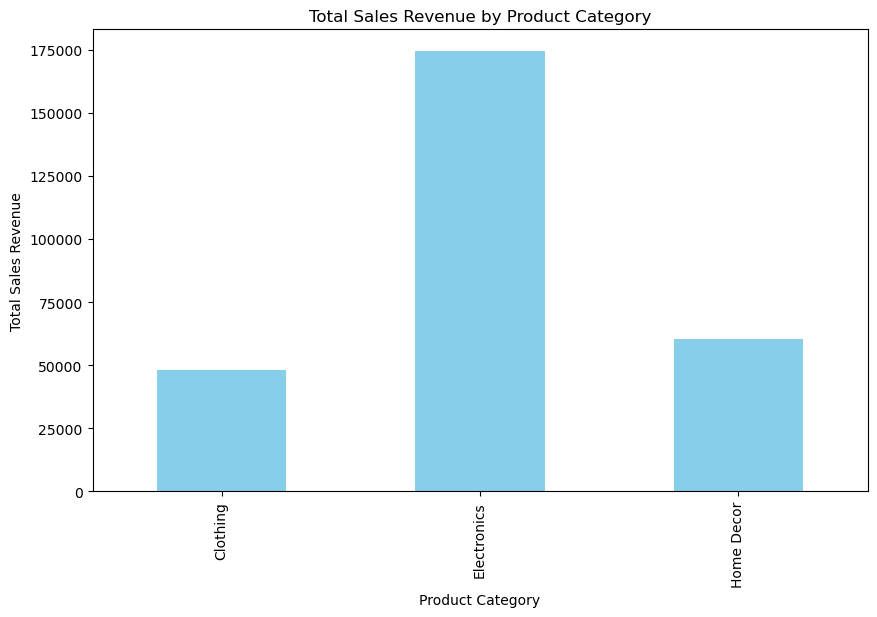

In [17]:
plt.figure(figsize=(10, 6))
total_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Revenue')
plt.show()

In [34]:
top_products = df.groupby('Product_Name')['Quantity_Sold'].sum().nlargest(5)

print("Top 5 Best-Selling Products:")
print(top_products)


Top 5 Best-Selling Products:
Product_Name
Product D    305
Product J    276
Product C    211
Product I    171
Product K    147
Name: Quantity_Sold, dtype: int64


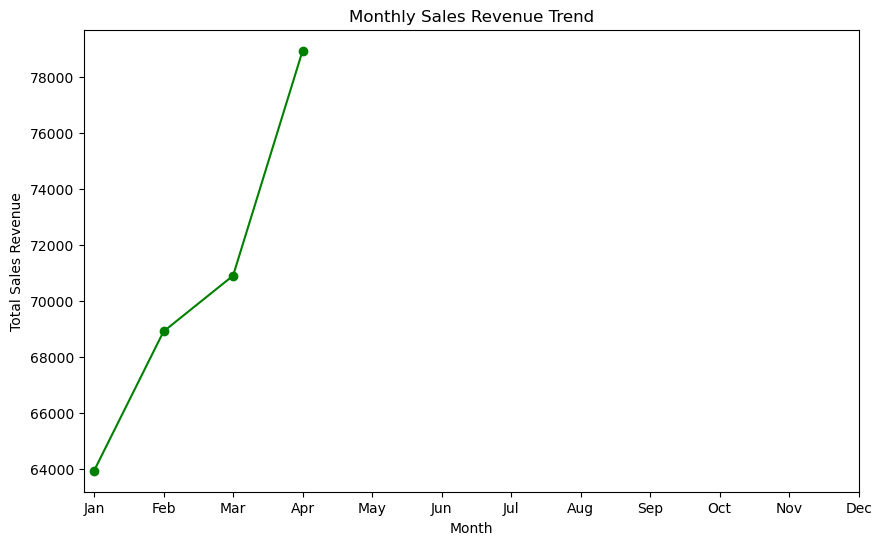

In [24]:
df['Date'] = pd.to_datetime(df['Date'])

monthly_sales = df.groupby(df['Date'].dt.month)['Sales_Revenue'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_labels)

plt.show()


In [26]:
df['Profit'] = df['Sales_Revenue'] - df['Cost_Price']
total_profit_per_product = df.groupby('Product_Name')['Profit'].sum()
most_profitable_product = total_profit_per_product.idxmax()

print(f"The most profitable product is '{most_profitable_product}' with a total profit of ${total_profit_per_product.max():,.2f}")


The most profitable product is 'Product H' with a total profit of $52,340.00


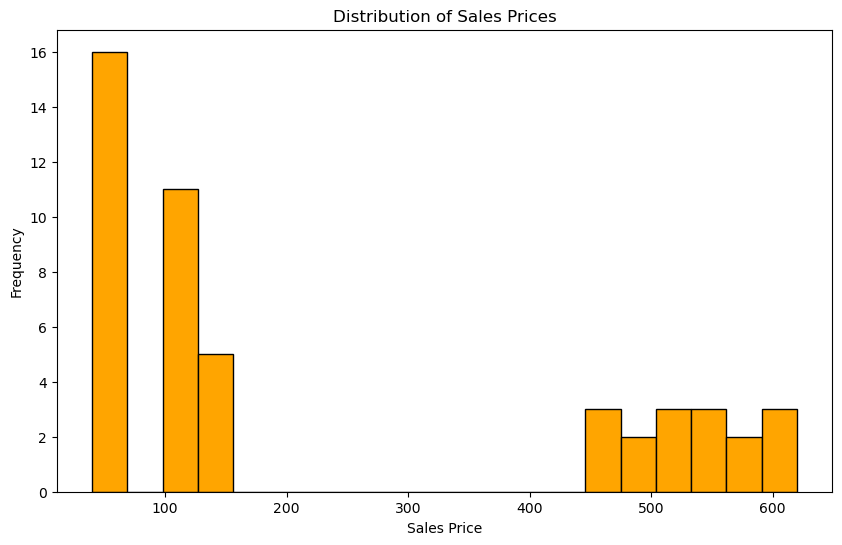

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df['Sales_Price'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Sales Prices')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()


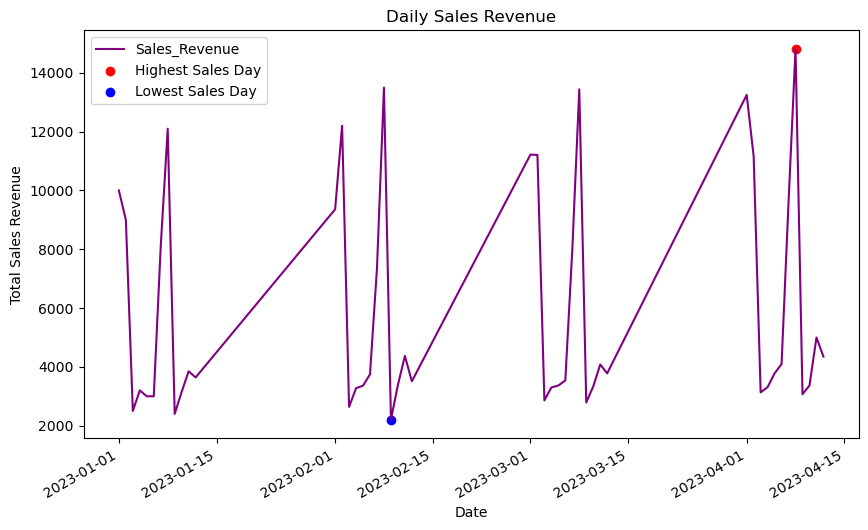

In [28]:
daily_sales = df.groupby('Date')['Sales_Revenue'].sum()
highest_sales_day = daily_sales.idxmax()
lowest_sales_day = daily_sales.idxmin()

plt.figure(figsize=(10, 6))
daily_sales.plot(kind='line', color='purple')
plt.scatter(highest_sales_day, daily_sales.loc[highest_sales_day], color='red', label='Highest Sales Day')
plt.scatter(lowest_sales_day, daily_sales.loc[lowest_sales_day], color='blue', label='Lowest Sales Day')
plt.title('Daily Sales Revenue')
plt.xlabel('Date')
plt.ylabel('Total Sales Revenue')
plt.legend()
plt.show()


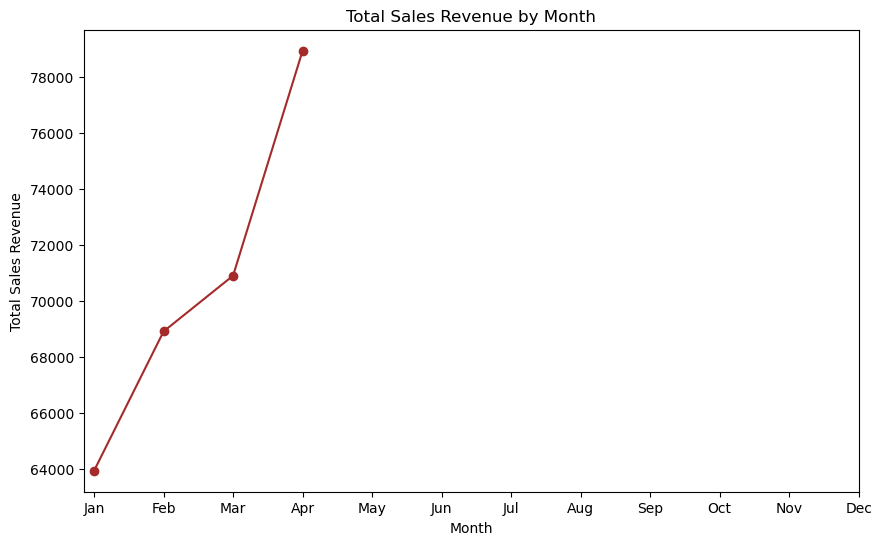

In [29]:
monthly_total_sales = df.groupby(df['Date'].dt.month)['Sales_Revenue'].sum()

plt.figure(figsize=(10, 6))
monthly_total_sales.plot(kind='line', marker='o', color='brown')
plt.title('Total Sales Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.xticks(range(1, 13), month_labels) 
plt.show()


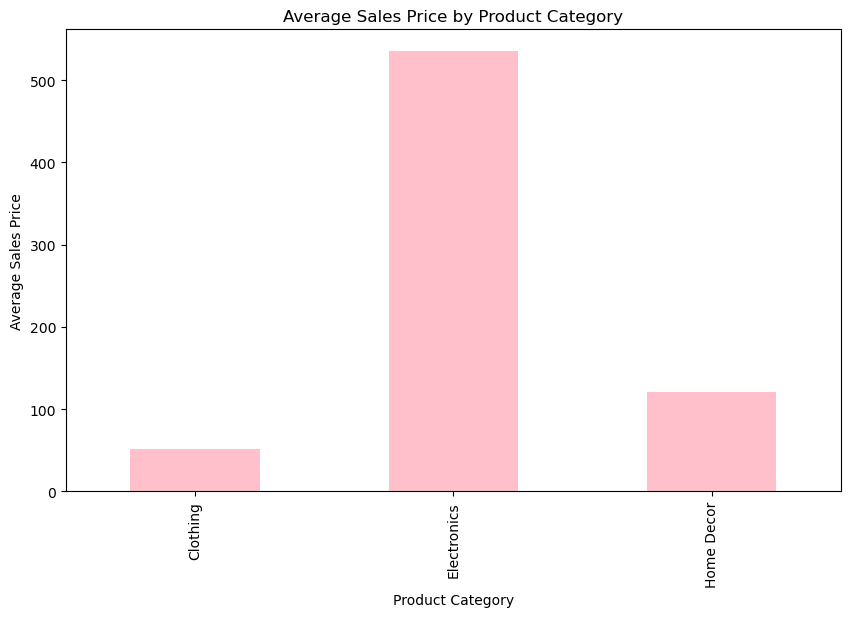

In [30]:
avg_sales_price = df.groupby('Category')['Sales_Price'].mean()

plt.figure(figsize=(10, 6))
avg_sales_price.plot(kind='bar', color='pink')
plt.title('Average Sales Price by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Sales Price')
plt.show()


In [31]:
correlation = df['Sales_Price'].corr(df['Quantity_Sold'])

print(f"Correlation between Sales Price and Quantity Sold: {correlation}")


Correlation between Sales Price and Quantity Sold: -0.716588779596294
